# Sign Game Server

Game Plan:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string

In [2]:
from sign_game.ml.landmarks import Landmarks

objc[55636]: Class CaptureDelegate is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x284154860) and /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x2c5e625a0). One of the two will be used. Which one is undefined.
objc[55636]: Class CVWindow is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x282ac0a68) and /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x2c5e625f0). One of the two will be used. Which one is undefined.
objc[55636]: Class CVView is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x282ac0a9

In [3]:
landmark = Landmarks()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
# !pip list

protobuf 3.11.0

## Dataset Preprocessing

In [4]:
# Dataset
df1 = pd.read_csv('../raw_data/hand-landmarks.csv')

In [5]:
df1.columns

Index(['Unnamed: 0', 'WRIST_x', 'WRIST_y', 'WRIST_z', 'THUMB_CMC_x',
       'THUMB_CMC_y', 'THUMB_CMC_z', 'THUMB_MCP_x', 'THUMB_MCP_y',
       'THUMB_MCP_z', 'THUMB_IP_x', 'THUMB_IP_y', 'THUMB_IP_z', 'THUMB_TIP_x',
       'THUMB_TIP_y', 'THUMB_TIP_z', 'INDEX_FINGER_MCP_x',
       'INDEX_FINGER_MCP_y', 'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_x',
       'INDEX_FINGER_PIP_y', 'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_x',
       'INDEX_FINGER_DIP_y', 'INDEX_FINGER_DIP_z', 'INDEX_FINGER_TIP_x',
       'INDEX_FINGER_TIP_y', 'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_x',
       'MIDDLE_FINGER_MCP_y', 'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_x',
       'MIDDLE_FINGER_PIP_y', 'MIDDLE_FINGER_PIP_z', 'MIDDLE_FINGER_DIP_x',
       'MIDDLE_FINGER_DIP_y', 'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_x',
       'MIDDLE_FINGER_TIP_y', 'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_x',
       'RING_FINGER_MCP_y', 'RING_FINGER_MCP_z', 'RING_FINGER_PIP_x',
       'RING_FINGER_PIP_y', 'RING_FINGER_PIP_z', 'RING_FINGER

In [6]:
X1 = df1.drop(columns=df1.columns[[0, -1]], axis=1)
X1.columns

Index(['WRIST_x', 'WRIST_y', 'WRIST_z', 'THUMB_CMC_x', 'THUMB_CMC_y',
       'THUMB_CMC_z', 'THUMB_MCP_x', 'THUMB_MCP_y', 'THUMB_MCP_z',
       'THUMB_IP_x', 'THUMB_IP_y', 'THUMB_IP_z', 'THUMB_TIP_x', 'THUMB_TIP_y',
       'THUMB_TIP_z', 'INDEX_FINGER_MCP_x', 'INDEX_FINGER_MCP_y',
       'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_x', 'INDEX_FINGER_PIP_y',
       'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_x', 'INDEX_FINGER_DIP_y',
       'INDEX_FINGER_DIP_z', 'INDEX_FINGER_TIP_x', 'INDEX_FINGER_TIP_y',
       'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_x', 'MIDDLE_FINGER_MCP_y',
       'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_x', 'MIDDLE_FINGER_PIP_y',
       'MIDDLE_FINGER_PIP_z', 'MIDDLE_FINGER_DIP_x', 'MIDDLE_FINGER_DIP_y',
       'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_x', 'MIDDLE_FINGER_TIP_y',
       'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_x', 'RING_FINGER_MCP_y',
       'RING_FINGER_MCP_z', 'RING_FINGER_PIP_x', 'RING_FINGER_PIP_y',
       'RING_FINGER_PIP_z', 'RING_FINGER_DIP_x', 'RING

In [7]:
df2 = pd.read_csv('../sample_sets/sample_training.csv')

In [8]:
df2.columns

Index(['class_type', 'wristX', 'wristY', 'wristZ', 'thumb_CmcX', 'thumb_CmcY',
       'thumb_CmcZ', 'thumb_McpX', 'thumb_McpY', 'thumb_McpZ', 'thumb_IpX',
       'thumb_IpY', 'thumb_IpZ', 'thumb_TipX', 'thumb_TipY', 'thumb_TipZ',
       'index_McpX', 'index_McpY', 'index_McpZ', 'index_PipX', 'index_PipY',
       'index_PipZ', 'index_DipX', 'index_DipY', 'index_DipZ', 'index_TipX',
       'index_TipY', 'index_TipZ', 'middle_McpX', 'middle_McpY', 'middle_McpZ',
       'middle_PipX', 'middle_PipY', 'middle_PipZ', 'middle_DipX',
       'middle_DipY', 'middle_DipZ', 'middle_TipX', 'middle_TipY',
       'middle_TipZ', 'ring_McpX', 'ring_McpY', 'ring_McpZ', 'ring_PipX',
       'ring_PipY', 'ring_PipZ', 'ring_DipX', 'ring_DipY', 'ring_DipZ',
       'ring_TipX', 'ring_TipY', 'ring_TipZ', 'pinky_McpX', 'pinky_McpY',
       'pinky_McpZ', 'pinky_PipX', 'pinky_PipY', 'pinky_PipZ', 'pinky_DipX',
       'pinky_DipY', 'pinky_DipZ', 'pinky_TipX', 'pinky_TipY', 'pinky_TipZ'],
      dtype='object')

In [9]:
X2 = df2.drop(columns=df2.columns[0], axis=1)
X2.columns=X1.columns
X2.columns

Index(['WRIST_x', 'WRIST_y', 'WRIST_z', 'THUMB_CMC_x', 'THUMB_CMC_y',
       'THUMB_CMC_z', 'THUMB_MCP_x', 'THUMB_MCP_y', 'THUMB_MCP_z',
       'THUMB_IP_x', 'THUMB_IP_y', 'THUMB_IP_z', 'THUMB_TIP_x', 'THUMB_TIP_y',
       'THUMB_TIP_z', 'INDEX_FINGER_MCP_x', 'INDEX_FINGER_MCP_y',
       'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_x', 'INDEX_FINGER_PIP_y',
       'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_x', 'INDEX_FINGER_DIP_y',
       'INDEX_FINGER_DIP_z', 'INDEX_FINGER_TIP_x', 'INDEX_FINGER_TIP_y',
       'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_x', 'MIDDLE_FINGER_MCP_y',
       'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_x', 'MIDDLE_FINGER_PIP_y',
       'MIDDLE_FINGER_PIP_z', 'MIDDLE_FINGER_DIP_x', 'MIDDLE_FINGER_DIP_y',
       'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_x', 'MIDDLE_FINGER_TIP_y',
       'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_x', 'RING_FINGER_MCP_y',
       'RING_FINGER_MCP_z', 'RING_FINGER_PIP_x', 'RING_FINGER_PIP_y',
       'RING_FINGER_PIP_z', 'RING_FINGER_DIP_x', 'RING

In [10]:
X = X1.append(X2, ignore_index=True)
X.shape

/var/folders/tk/8tg4bh0j0fx3cbdk4nrv8rfw0000gn/T/ipykernel_55636/2572424810.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X1.append(X2, ignore_index=True)


(2848, 63)

In [11]:
y1=df1['TARGET']
y2=df2['class_type']
y=y1.append(y2, ignore_index=True)
y

/var/folders/tk/8tg4bh0j0fx3cbdk4nrv8rfw0000gn/T/ipykernel_55636/3843065781.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y1.append(y2, ignore_index=True)


0       A
1       A
2       A
3       A
4       A
       ..
2843    J
2844    J
2845    J
2846    J
2847    J
Length: 2848, dtype: object

In [12]:
y.value_counts()

A    112
L    112
W    112
E    112
F    112
V    112
R    112
B    112
M    112
Y    111
U    111
N    111
K    111
I    111
D    111
Z    111
S    110
O    109
H    108
C    108
G    107
T    106
X    105
P    104
Q    104
J    102
dtype: int64

In [13]:
# Encoding letters to numerical, A-Z = 0-25
y = pd.Categorical(y)

In [14]:
y.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

In [15]:
cat_list = list(y.categories)
cat_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [16]:
y = y.codes
display(len(y))
y

2848

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2278, 63), (2278,), (570, 63), (570,))

In [19]:
classes = len(cat_list)
print(classes)

26


In [20]:
# y_train = to_categorical(y_train, num_classes=classes)

In [21]:
# y_test = to_categorical(y_test, num_classes=classes)

In [22]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, X_test.shape)

(2278, 63, 1) (570, 63, 1)


## CNN Model

### Original CNN

In [23]:
# Architecture
# model = models.Sequential()
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax')) 
#accuracy: 0.89

### Reduced CNN 1

In [24]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.71

### Reduced CNN 2

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.81

### Reduced CNN 3

In [42]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.86

### Reduced CNN 4

In [25]:
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 16)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 64)            0

In [28]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [29]:
history = model.fit(X_train, 
                    y_train,
                    epochs=500, 
                    validation_split=0.3, 
                    callbacks=es)

Epoch 1/500


2023-03-09 14:21:08.395733: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 1s 4ms/step - loss: 35.1835 - accuracy: 0.0496 - val_loss: 5.0175 - val_accuracy: 0.0497
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 4.4670 - accuracy: 0.0533 - val_loss: 3.3039 - val_accuracy: 0.0629
Epoch 3/500
50/50 [==============================] - 0s 2ms/step - loss: 3.4921 - accuracy: 0.0583 - val_loss: 3.2356 - val_accuracy: 0.0380
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 3.3042 - accuracy: 0.0590 - val_loss: 3.1823 - val_accuracy: 0.0497
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 3.2290 - accuracy: 0.0753 - val_loss: 3.1382 - val_accuracy: 0.0658
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 3.1940 - accuracy: 0.1066 - val_loss: 3.0452 - val_accuracy: 0.1506
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 2.9639 - accuracy: 0.1939 - val_loss: 2.7118 - val_accuracy: 0.3275
Epoch 8/500
50/50 [=====

Epoch 59/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.8118 - val_loss: 0.6597 - val_accuracy: 0.8099
Epoch 60/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8124 - val_loss: 0.6112 - val_accuracy: 0.8377
Epoch 61/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8369 - val_loss: 0.5531 - val_accuracy: 0.8392
Epoch 62/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8400 - val_loss: 0.6073 - val_accuracy: 0.8202
Epoch 63/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.8212 - val_loss: 0.6107 - val_accuracy: 0.8099
Epoch 64/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8325 - val_loss: 0.5709 - val_accuracy: 0.8450
Epoch 65/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.8294 - val_loss: 0.5455 - val_accuracy: 0.8260
Epoch 

In [30]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 816us/step - loss: 0.4791 - accuracy: 0.8982


[0.4791259169578552, 0.898245632648468]

## Predict

In [31]:
# Dataset
df_pred = pd.read_csv('../sample_sets/sample_validation.csv')

In [32]:
df_pred.columns

Index(['class_type', 'wristX', 'wristY', 'wristZ', 'thumb_CmcX', 'thumb_CmcY',
       'thumb_CmcZ', 'thumb_McpX', 'thumb_McpY', 'thumb_McpZ', 'thumb_IpX',
       'thumb_IpY', 'thumb_IpZ', 'thumb_TipX', 'thumb_TipY', 'thumb_TipZ',
       'index_McpX', 'index_McpY', 'index_McpZ', 'index_PipX', 'index_PipY',
       'index_PipZ', 'index_DipX', 'index_DipY', 'index_DipZ', 'index_TipX',
       'index_TipY', 'index_TipZ', 'middle_McpX', 'middle_McpY', 'middle_McpZ',
       'middle_PipX', 'middle_PipY', 'middle_PipZ', 'middle_DipX',
       'middle_DipY', 'middle_DipZ', 'middle_TipX', 'middle_TipY',
       'middle_TipZ', 'ring_McpX', 'ring_McpY', 'ring_McpZ', 'ring_PipX',
       'ring_PipY', 'ring_PipZ', 'ring_DipX', 'ring_DipY', 'ring_DipZ',
       'ring_TipX', 'ring_TipY', 'ring_TipZ', 'pinky_McpX', 'pinky_McpY',
       'pinky_McpZ', 'pinky_PipX', 'pinky_PipY', 'pinky_PipZ', 'pinky_DipX',
       'pinky_DipY', 'pinky_DipZ', 'pinky_TipX', 'pinky_TipY', 'pinky_TipZ'],
      dtype='object')

In [33]:
X_pred = df_pred.drop(columns = ['class_type'])
X_pred

,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,thumb_IpX,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,67.593429,3675.696075,-0.000018,99.616661,3761.902771,-0.026927,110.972045,3835.375763,-0.026853,121.125584,...,0.072837,114.973211,3854.573547,0.097510,129.272298,3879.857758,0.108352,140.462808,3898.238983,0.113854
1,1436.803349,1737.654764,-0.000152,1578.083852,1765.562633,-0.157858,1641.237340,1777.532579,-0.304467,1646.324825,...,-0.341164,1227.836695,1684.198194,-0.456003,1278.155567,1867.738249,-0.464728,1338.902637,1969.229223,-0.469522
2,648.545802,1607.948065,-0.000153,467.789233,1466.462970,-0.050314,448.115349,1191.233873,-0.097409,611.626387,...,-0.163922,998.544693,1039.246440,-0.247517,893.199384,1167.122245,-0.246745,882.732987,1264.709234,-0.227733
3,833.924472,1559.609413,-0.000164,648.933053,1397.195578,-0.041743,647.326112,1105.966210,-0.078414,848.145723,...,-0.155674,1185.740709,996.946692,-0.238493,1068.991184,1137.645721,-0.229178,1069.342017,1233.988047,-0.199588
4,2585.928783,2014.379934,-0.000058,2489.925442,1913.919084,-0.022915,2510.127912,1722.629985,-0.031609,2600.052752,...,-0.016604,2819.434075,1749.852462,-0.053624,2737.283750,1812.189479,-0.053119,2664.588332,1866.325679,-0.041351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1354.846124,1946.291035,-0.000071,1436.005777,1831.889364,0.112920,1450.998651,1713.268372,0.166175,1466.387431,...,0.008276,1312.858226,1421.120537,0.016607,1307.488609,1353.245492,0.018358,1307.269927,1301.262153,0.013307
200,900.431514,1510.550857,-0.000056,1124.763131,1308.396101,0.072219,1196.975231,1071.930170,0.099373,1109.926462,...,-0.109490,413.159043,927.854598,-0.097462,296.604931,811.812997,-0.115920,186.776280,710.417211,-0.161983
201,72.850646,3754.295013,-0.000019,135.652102,3874.291260,-0.027033,141.803033,3974.507446,-0.027239,144.245676,...,0.094596,69.929686,3992.984802,0.126661,85.686087,4023.706146,0.142894,99.380424,4046.099579,0.154124
202,1260.964149,2159.256546,0.000274,1335.243220,1851.975826,0.219779,1252.857707,1601.350079,0.317800,1106.594398,...,-0.040661,391.540262,1692.171650,0.013872,211.291803,1652.817776,0.028499,59.546666,1606.800190,0.009594


In [34]:
X_pred = np.reshape(np.array(X_pred), (X_pred.shape[0], X_pred.shape[1], 1))
display(X_pred.shape)
display(type(X_pred))

(204, 63, 1)

numpy.ndarray

In [60]:
y_act = df_pred['class_type']
y_act

0      N
1      N
2      N
3      N
4      N
      ..
199    J
200    J
201    J
202    J
203    J
Name: class_type, Length: 204, dtype: object

In [61]:
y_pred = model.predict(X_pred)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[3.0128675e-04, 7.1483463e-02, 1.9986966e-01, ..., 1.1340240e-03,
        2.0885082e-05, 9.9486229e-04],
       [3.0138030e-05, 3.7758343e-04, 2.6883427e-07, ..., 5.3741480e-04,
        2.6755901e-03, 5.2823923e-03],
       [3.8324943e-06, 7.4575488e-05, 3.1499576e-04, ..., 3.4749337e-06,
        2.3069919e-08, 1.2980892e-06],
       ...,
       [2.3116294e-04, 7.0449941e-02, 2.0160230e-01, ..., 1.0014522e-03,
        1.2304229e-05, 7.2396221e-04],
       [9.6819028e-02, 3.3259726e-04, 6.8305567e-06, ..., 3.8184505e-03,
        9.6564839e-04, 1.9354795e-04],
       [7.3243193e-03, 1.3882038e-07, 3.0736810e-08, ..., 2.1267217e-03,
        1.3204506e-02, 4.0545806e-04]], dtype=float32)

In [62]:
preds = [cat_list[np.argmax(pred)] for pred in y_pred]
preds

['C',
 'Q',
 'N',
 'N',
 'N',
 'Q',
 'E',
 'N',
 'R',
 'R',
 'R',
 'R',
 'V',
 'C',
 'R',
 'U',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'F',
 'C',
 'B',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'F',
 'N',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'H',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'E',
 'E',
 'E',
 'X',
 'E',
 'E',
 'B',
 'W',
 'B',
 'U',
 'U',
 'U',
 'U',
 'R',
 'K',
 'U',
 'M',
 'I',
 'B',
 'M',
 'M',
 'M',
 'M',
 'Q',
 'G',
 'Z',
 'P',
 'X',
 'M',
 'Z',
 'X',
 'L',
 'H',
 'K',
 'B',
 'K',
 'K',
 'V',
 'K',
 'K',
 'K',
 'K',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'S',
 'I',
 'J',
 'S',
 'S',
 'Q',
 'Q',
 'J',
 'H',
 'G',
 'G',
 'G',
 'C',
 'G',
 'G',
 'G',
 'A',
 'A',
 'Y',
 'I',
 'C',
 'J',
 'A',
 'V',
 'O',
 'O',
 'O',
 'O',
 'O',
 'C',
 'Z',
 'O',
 'T',
 'X',
 'I',
 'C',
 'L',
 'T',
 'C',
 'T',
 'V',
 'V',
 'V',
 'W',
 'V',
 'V',
 'R',
 'V',
 'Z',
 'Z',
 'P',
 'Z',
 'Z',
 'Z',
 'Z',
 'C',
 'C',
 'O',
 'C',
 'C',
 'O',
 'C'

In [38]:
correct=0
comparisons=list(zip(preds, y_act))
for comparison in comparisons:
    if comparison[0]==comparison[1]:
        correct+=1
correct_percent=correct/len(y_act)
print('Correct Predictions: ', correct_percent)

Correct Predictions:  0.7058823529411765


In [39]:
np.unique(np.array(preds))

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [42]:
preds

['C',
 'Q',
 'N',
 'N',
 'N',
 'Q',
 'E',
 'N',
 'R',
 'R',
 'R',
 'R',
 'V',
 'C',
 'R',
 'U',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'F',
 'C',
 'B',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'F',
 'N',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'H',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'E',
 'E',
 'E',
 'X',
 'E',
 'E',
 'B',
 'W',
 'B',
 'U',
 'U',
 'U',
 'U',
 'R',
 'K',
 'U',
 'M',
 'I',
 'B',
 'M',
 'M',
 'M',
 'M',
 'Q',
 'G',
 'Z',
 'P',
 'X',
 'M',
 'Z',
 'X',
 'L',
 'H',
 'K',
 'B',
 'K',
 'K',
 'V',
 'K',
 'K',
 'K',
 'K',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Q',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'S',
 'I',
 'J',
 'S',
 'S',
 'Q',
 'Q',
 'J',
 'H',
 'G',
 'G',
 'G',
 'C',
 'G',
 'G',
 'G',
 'A',
 'A',
 'Y',
 'I',
 'C',
 'J',
 'A',
 'V',
 'O',
 'O',
 'O',
 'O',
 'O',
 'C',
 'Z',
 'O',
 'T',
 'X',
 'I',
 'C',
 'L',
 'T',
 'C',
 'T',
 'V',
 'V',
 'V',
 'W',
 'V',
 'V',
 'R',
 'V',
 'Z',
 'Z',
 'P',
 'Z',
 'Z',
 'Z',
 'Z',
 'C',
 'C',
 'O',
 'C',
 'C',
 'O',
 'C'

In [51]:
print(len(preds), len(y_act))

204 204


              precision    recall  f1-score   support

           A       1.00      0.38      0.55         8
           B       0.64      0.78      0.70         9
           C       0.33      0.75      0.46         8
           D       1.00      0.71      0.83         7
           E       0.83      0.62      0.71         8
           F       0.88      0.88      0.88         8
           G       0.86      0.75      0.80         8
           H       0.78      0.88      0.82         8
           I       0.64      1.00      0.78         7
           J       0.62      0.83      0.71         6
           K       0.88      0.78      0.82         9
           L       0.78      0.78      0.78         9
           M       0.71      0.56      0.63         9
           N       0.80      0.50      0.62         8
           O       0.75      0.75      0.75         8
           P       0.67      0.80      0.73         5
           Q       0.58      1.00      0.74         7
           R       0.71    

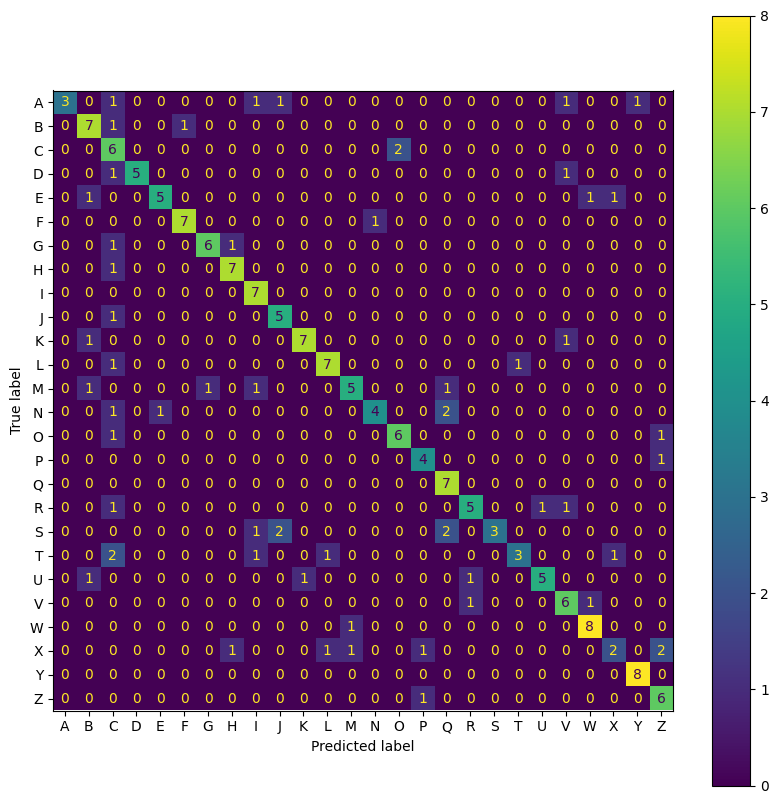

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_matrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.close(1) # don't display pre-sized matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax)
    print(classification_report(y_true, y_pred))
    plt.show()


evaluate_matrix(y_act, preds)

In [96]:
def evaluate_model(model, X_test, y_test):
    # Preditions on holdout test dataset
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=range(26), columns=range(26))
    plt.figure(figsize=(10, 8))
    plt.title('Model Confusion Matrix')
    plt.xlabel('Predicted Letter')
    plt.ylabel('True Letter')
    plt.xticks(range(26), labels=range(26))
    plt.yticks(range(26), labels=range(26))
    plt.imshow(cm_df, cmap='Blues')
    plt.colorbar()
    plt.show()
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print('Accuracy:', accuracy)

evaluate_model(model, X_pred, )